# RoadAI - PyTorch Classifier Implementation.

This is a side project for PyTorch Facebook - Udacity Challenge Scholarship. In this scholarship, 10.000 accepted students will spend 2 months building powerful deep learning models with PyTorch. Top 300 students from the initial challenge course will be selected for the Deep Learning Nanodegree program.

The project is called RoadAI, mobile app and deep learning model. Building the most intelligent co-driver.

# Model used
VGG-19 is an excellent Convolutional Neural Network (CNN) for image classification and I used the pre-trained version that exists in PyTorch models package. After freezing the main features of the network to avoid changes during backpropagation, I replaced the classifier part with my own designed classifier.
The classifier is inspired by NVIDIA's neural network used again in Behavioural Cloning Project (check repo) with an added layer of 20588 neurons in the beginning and of course change the number of classes to 4. (Car, Red, Yellow, Green) 

# Training

During training, I used the pocket algorithm's idea to store and save the model with the minimum validation error to avoid overfitting during unneccesary training steps. The training was done in Udacity's GPU Workspace.

# Results

The model had more than >80% accuracy in the validation.

<img src='assets/Results2.png' width=500px>
<img src='assets/Results1.png' width=500px>
<img src='assets/Results3.png' width=500px>

In [2]:
# All Imports
import torch
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.models as models
import torchvision.models as models
from collections import OrderedDict
import torch
from torch import nn
from torch import optim

In [3]:
#Directories for training and validation sets
data_dir = 'data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [4]:
# Define your transforms for the training and validation sets
data_transforms = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

# Load the datasets with ImageFolder
image_datasets = torchvision.datasets.ImageFolder(data_dir)

train_data = datasets.ImageFolder(train_dir, transform=data_transforms)
test_data = datasets.ImageFolder(valid_dir, transform=data_transforms)

# Define dataloader parameters
batch_size = 100
num_workers=0

# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

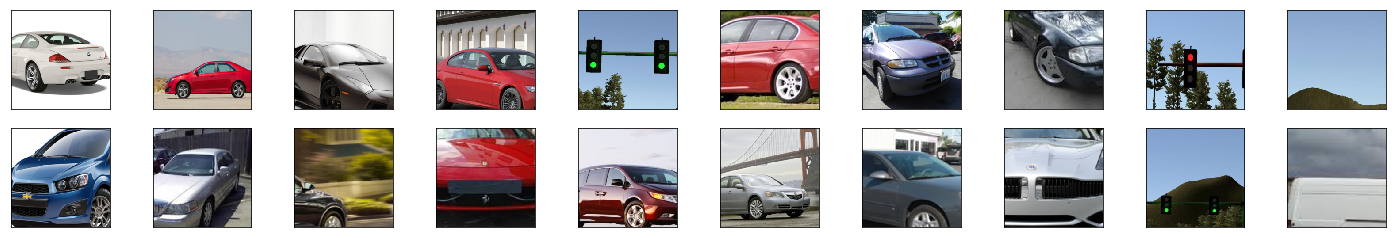

In [5]:
# Visualize some sample data

# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))   

In [6]:
#Load the pretrained vgg19 model
model = models.vgg19(pretrained=True)

# Freeze training for all "features" layers
for param in model.features.parameters():
    param.requires_grad = False
    
#Print the model's architecture
print (model)    

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [11]:
#Change the classifier's layers - Define my own classifier
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(4096, 40)),
                          ('relu', nn.ReLU()),
                          ('fc3', nn.Linear(40, 20)),
                          ('relu', nn.ReLU()),
                          ('fc4', nn.Linear(20, 4)),
                          ('relu', nn.ReLU()), 
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

#Change the classifier's layers - Change the classifier section in VGG19
model.classifier = classifier

#Print the architecture of our new model
print (model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [12]:
#Define the loss and the optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [14]:
###----------------TRAINING----------------------##

#Hyperparameters
epochs = 20
steps = 0
running_loss = 0
print_every = 1

valid_loss_min = np.Inf # track change in validation loss

# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Comment this line if train in CPU
#model.cuda();

#Training loop
for epoch in range(epochs):
    for inputs, labels in train_loader:
        steps += 1
        #Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        #Clear the gradients of all optimized variables
        optimizer.zero_grad()
        
        #Forward and backward propagate the network
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        #Training loss
        running_loss += loss.item()
        
        #Validation of the model every 5 steps of training
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    
                    #Forward and backward propagate the network
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    #Testing loss
                    test_loss += batch_loss.item()
                    
                    #Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    #Save model if validation loss has decreased
                    if test_loss <= valid_loss_min:
                        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                                valid_loss_min,
                                test_loss))
                        torch.save(model.state_dict(), 'roadai_model.pt')
                        valid_loss_min = test_loss
            
            #Print the results
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            
            #Train model
            model.train()

Validation loss decreased (inf --> 1.336698).  Saving model ...
Epoch 1/20.. Train loss: 0.031.. Test loss: 1.337.. Test accuracy: 0.524
Validation loss decreased (1.336698 --> 1.128071).  Saving model ...
Epoch 1/20.. Train loss: 0.121.. Test loss: 1.128.. Test accuracy: 0.610
Epoch 1/20.. Train loss: 0.026.. Test loss: 1.287.. Test accuracy: 0.622
Epoch 1/20.. Train loss: 0.048.. Test loss: 1.397.. Test accuracy: 0.585
Validation loss decreased (1.128071 --> 0.990822).  Saving model ...
Epoch 1/20.. Train loss: 0.135.. Test loss: 0.991.. Test accuracy: 0.622
Epoch 1/20.. Train loss: 0.164.. Test loss: 1.168.. Test accuracy: 0.573
Epoch 1/20.. Train loss: 0.016.. Test loss: 1.300.. Test accuracy: 0.537
Epoch 2/20.. Train loss: 0.033.. Test loss: 1.165.. Test accuracy: 0.537
Epoch 2/20.. Train loss: 0.021.. Test loss: 1.076.. Test accuracy: 0.573
Epoch 2/20.. Train loss: 0.088.. Test loss: 1.069.. Test accuracy: 0.573
Validation loss decreased (0.990822 --> 0.887573).  Saving model ...

Epoch 15/20.. Train loss: 0.002.. Test loss: 0.786.. Test accuracy: 0.732
Epoch 16/20.. Train loss: 0.013.. Test loss: 0.730.. Test accuracy: 0.768
Epoch 16/20.. Train loss: 0.021.. Test loss: 1.081.. Test accuracy: 0.720
Epoch 16/20.. Train loss: 0.021.. Test loss: 0.585.. Test accuracy: 0.793
Epoch 16/20.. Train loss: 0.016.. Test loss: 0.847.. Test accuracy: 0.707
Validation loss decreased (0.524061 --> 0.509817).  Saving model ...
Epoch 16/20.. Train loss: 0.073.. Test loss: 0.510.. Test accuracy: 0.805
Epoch 16/20.. Train loss: 0.000.. Test loss: 0.580.. Test accuracy: 0.768
Epoch 16/20.. Train loss: 0.000.. Test loss: 0.724.. Test accuracy: 0.793
Epoch 17/20.. Train loss: 0.007.. Test loss: 0.632.. Test accuracy: 0.793
Epoch 17/20.. Train loss: 0.158.. Test loss: 0.814.. Test accuracy: 0.732
Epoch 17/20.. Train loss: 0.043.. Test loss: 0.738.. Test accuracy: 0.768
Epoch 17/20.. Train loss: 0.039.. Test loss: 0.889.. Test accuracy: 0.768
Epoch 17/20.. Train loss: 0.003.. Test loss

In [ ]:
##----------Print results in validation set----------##

#Define new test model
model_test = models.vgg19(pretrained=False)
for param in model.parameters():
        param.requires_grad = False
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(4096, 40)),
                          ('relu', nn.ReLU()),
                          ('fc3', nn.Linear(40, 20)),
                          ('relu', nn.ReLU()),
                          ('fc4', nn.Linear(20, 4)),
                          ('relu', nn.ReLU()), 
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
model_test.classifier = classifier

#Load in CPU
model_test.load_state_dict(torch.load('roadai_model.pt', map_location=lambda storage, loc: storage))

#Load in GPU
#model_test.cuda()
#model_test.load_state_dict(torch.load('model.pt'))

#Obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

#Move model inputs to cuda, if GPU available. Comment if in CPU
#images = images.cuda()

#Get sample outputs
output = model_test(images)
#Convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

#Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format([preds[idx]], [labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))